In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [2]:
# Load the dataset
df = pd.read_csv("CAR DETAILS.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
# Drop duplicates
df.drop_duplicates(inplace=True)
df.shape

(3577, 8)

In [5]:
name = df["name"].str.split(" ", expand = True)
df["car_maker"] = name[0]
df["car_model"] = name[1]

In [6]:
# Calculate car age
df["car_age"] = 2023 - df["year"]
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [7]:
df.drop(["name"], axis=1, inplace=True)

In [8]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [9]:
encoder= LabelEncoder()

In [10]:
# Creating a for loop for Encoding multiple columns
encoded_columns = df[['fuel', 'seller_type', 'transmission', 'owner',"car_maker", "car_model"]]

for i in encoded_columns:
  df[i] = encoder.fit_transform(df[i])

In [11]:
# Encoding data with get dummies
#df = pd.get_dummies(df, drop_first=True, columns = ["car_maker", "car_model"])
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_maker,car_model,car_age
0,2007,60000,70000,4,1,1,0,18,6,16
1,2007,135000,50000,4,1,1,0,18,164,16
2,2012,600000,100000,1,1,1,0,10,161,11
3,2017,250000,46000,4,1,1,0,5,125,6
4,2014,450000,141000,1,1,1,2,9,17,9


In [12]:
# Split data into features and target
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [14]:
print(X_train)

      year  km_driven  fuel  seller_type  transmission  owner  car_maker  \
1626  2016      64156     4            2             1      0         26   
2925  2017     120000     1            1             1      0         17   
794   2015      60000     1            1             1      0         17   
2313  2016      60000     4            1             1      2         23   
400   2017     160000     1            1             1      0         17   
...    ...        ...   ...          ...           ...    ...        ...   
1774  2020       1010     4            0             1      3          8   
3033  2008      70000     4            1             1      4         18   
552   2013       1000     1            0             1      2         23   
1363  2003      90000     4            1             1      2         18   
188   2016      70000     1            1             0      0         27   

      car_model  car_age  
1626         43        7  
2925        148        6  
794   

In [15]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

In [16]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'car_maker', 'car_model', 'car_age'],
      dtype='object')

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_models(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(f"Evaluating {name}:")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print("MAE:", mae)
        print("MSE:", mse)
        print("R2 Score:", r2)
        print("Training Score: ", model.score(X_train, y_train))
        print("Testing Score: ", model.score(X_test, y_test))
        print()
        
# Call the function to evaluate models        
evaluate_models(models, X_train, y_train, X_test, y_test)

Evaluating Linear Regression:
MAE: 230331.2755446433
MSE: 152462807277.5198
R2 Score: 0.39025136863454246
Training Score:  0.43697262242827006
Testing Score:  0.39025136863454246

Evaluating Ridge Regression:
MAE: 230213.41697530748
MSE: 152335346539.97128
R2 Score: 0.3907611258117901
Training Score:  0.43696836632380165
Testing Score:  0.3907611258117901

Evaluating Lasso Regression:
MAE: 230330.80535690504
MSE: 152462345947.92188
R2 Score: 0.39025321364248877
Training Score:  0.43697262235941003
Testing Score:  0.39025321364248877

Evaluating KNeighbors Regressor:
MAE: 279060.2069832402
MSE: 266746121320.80997
R2 Score: -0.06680498215770525
Training Score:  0.3545540094709775
Testing Score:  -0.06680498215770525

Evaluating Random Forest Regressor:


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.106e+14, tolerance: 7.481e+10
  model = cd_fast.enet_coordinate_descent(


MAE: 128746.61715331537
MSE: 77594956512.32535
R2 Score: 0.6896723904071206
Training Score:  0.9520214554401294
Testing Score:  0.6896723904071206



In [18]:
###  using hyper-perameter tuingng Random Forest Regressionrandom_state = 7, max_depth=10
rf= RandomForestRegressor(max_depth=15, random_state = 7)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=7)

In [19]:
def scores(y_test, y_pred):
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)
  print("MAE: ", mae)
  print("MSE: ", mse)
  print("RMSE: ", rmse)
  print("R2 Score: ", r2)

def model_score(model):
  print("Training Score: ", model.score(X_train, y_train))
  print("Testing Score: ", model.score(X_test, y_test))


In [20]:
model_score(rf)

y_pred= rf.predict(X_test)

scores(y_test,y_pred)

Training Score:  0.9541307494063433
Testing Score:  0.6872392373323697
MAE:  130225.34518362136
MSE:  78203347133.0336
RMSE:  279648.61367979925
R2 Score:  0.6872392373323697


In [21]:
### Saving the best model using Pickle
with open('rfmodel.pkl', 'wb') as file:
    pickle.dump(rf, file)


In [22]:
df_sample = df.sample(n=20, random_state = 15)
df_sample.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_maker,car_model,car_age
249,2018,500000,32000,4,1,1,0,10,74,5
1869,2016,360000,30000,4,1,1,0,18,147,7
3319,2016,700000,160000,1,1,1,0,23,48,7
3964,2014,550000,58231,1,0,1,0,23,48,9
1258,2017,220000,40000,4,1,1,0,5,125,6


In [23]:
# Saving the Sample Dataset
df_sample.to_csv("sample-dataset.csv")

In [24]:
#### Loading the best model using Pickle

# Load the saved trained ML model
with open('rfmodel.pkl', 'rb') as file:
    best_model = pickle.load(file)
best_model

RandomForestRegressor(max_depth=15, random_state=7)

In [25]:
### Selecting 20 Dependent and Independent Variable randomly from dataset

x_sample = df_sample.drop("selling_price", axis = 1)
y_sample = df_sample["selling_price"]
print(x_sample.shape)
print(y_sample.shape)

(20, 9)
(20,)


In [26]:
#### Generate the Predictions for randomly 20 points selected from dataset
ypred_sample = best_model.predict(x_sample)
ypred_sample

array([513205.4398142 , 417962.55990585, 611462.30950912, 565168.04470051,
       275253.39286202, 118759.89      , 101347.79301493, 137882.1018414 ,
        75067.94380967, 250489.75270563, 618046.09448137, 376500.        ,
       282772.93795535,  72122.49      , 292974.7497513 , 228354.93843295,
       775980.86196511, 135112.20515152, 312432.14690489, 325640.48256341])

In [27]:
model_score(best_model)

scores(y_sample,ypred_sample)

Training Score:  0.9541307494063433
Testing Score:  0.6872392373323697
MAE:  26301.299635391428
MSE:  1255628055.6695287
RMSE:  35434.84239656681
R2 Score:  0.9722258412539782


In [28]:
# Perform cross-validation for the RandomForestRegressor
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_scores
print("Cross-Validation MSE Scores:", cv_mse_scores)
print("Mean MSE:", cv_mse_scores.mean())

Cross-Validation MSE Scores: [1.37210218e+11 5.86847853e+10 3.36683132e+10 2.67571575e+10
 1.63008216e+11]
Mean MSE: 83865737894.54265


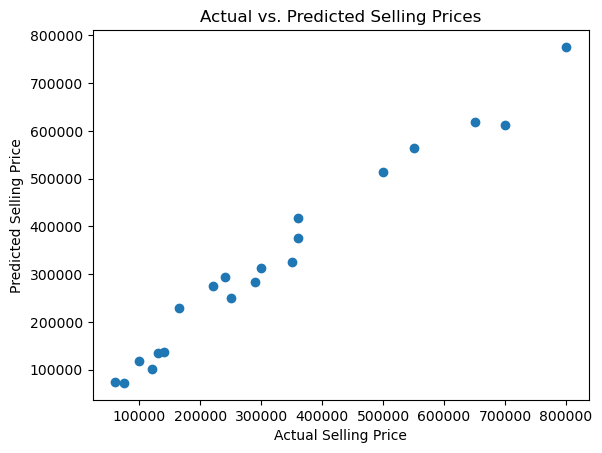

In [29]:
# Visualize predicted vs. actual selling prices
plt.scatter(y_sample, ypred_sample)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()